In [24]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import os
import geopandas as gpd
from geopandas import GeoDataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###  Find and load the data

#### From: http://www1.nyc.gov/
#### Folder name: nycb2010_16d

In [25]:
if not os.path.isfile("nycb2010_16d.zip"): 
    os.system("! wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip")
    os.system("! unzip nycb2010_16d.zip")

In [26]:
ct_shape = GeoDataFrame.from_file("nycb2010_16d/nycb2010.shp")

In [27]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


### Convert the coordinates and extract the Brooklyn shape

#### epsg=2263 is US feet. Convert them in epsg=4326

In [28]:
from fiona.crs import from_epsg

In [29]:
ct_shape=ct_shape.to_crs(epsg=4326)

In [30]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708748...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


In [31]:
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"]

In [32]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


### Find the coordinates of CUSP and create a point shapely geometry

#### According to http://www.gps-coordinates.net/ , the coordinates of CUSP : (-73.98663650000003 40.6931259)

In [51]:
import shapely
from shapely.geometry import Point, asShape

In [52]:
CUSP = Point(-73.98663650000003,40.6931259)

### Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [64]:
asShape?

In [65]:
for i in ct_latlon.index:
    if shapely.geometry.asShape(ct_latlon.geometry[i]).contains(CUSP):
        index = i
        ct = ct_latlon.geometry[i]
        print('CUSP is contained in', ct)

CUSP is contained in POLYGON ((-73.98619262163142 40.69375351897136, -73.98621117787486 40.6933838601358, -73.98622595691906 40.69308831343839, -73.98725396415627 40.69312490276504, -73.98722751058244 40.69379951953569, -73.98619262163142 40.69375351897136))


### Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the location of cusp as a point (using pylab.scatter) . Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [68]:
ct_latlon_10 = ct_latlon.iloc[::10]

In [69]:
ct_latlon_10.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
5047,30035001000,3,Brooklyn,1000,003500,10469.636350,507.804498,POLYGON ((-73.97551988364874 40.68675683612325...
5057,30054001000,3,Brooklyn,1000,005400,189033.189700,1938.321547,POLYGON ((-74.03649125984289 40.61798915520121...
5067,30067001000,3,Brooklyn,1000,006700,198454.446949,1936.158155,POLYGON ((-73.99440802432692 40.68545249602955...
5077,30084001000,3,Brooklyn,1000,008400,208451.540053,2121.627337,POLYGON ((-74.00041318188852 40.65462870194952...


In [71]:
from descartes import PolygonPatch

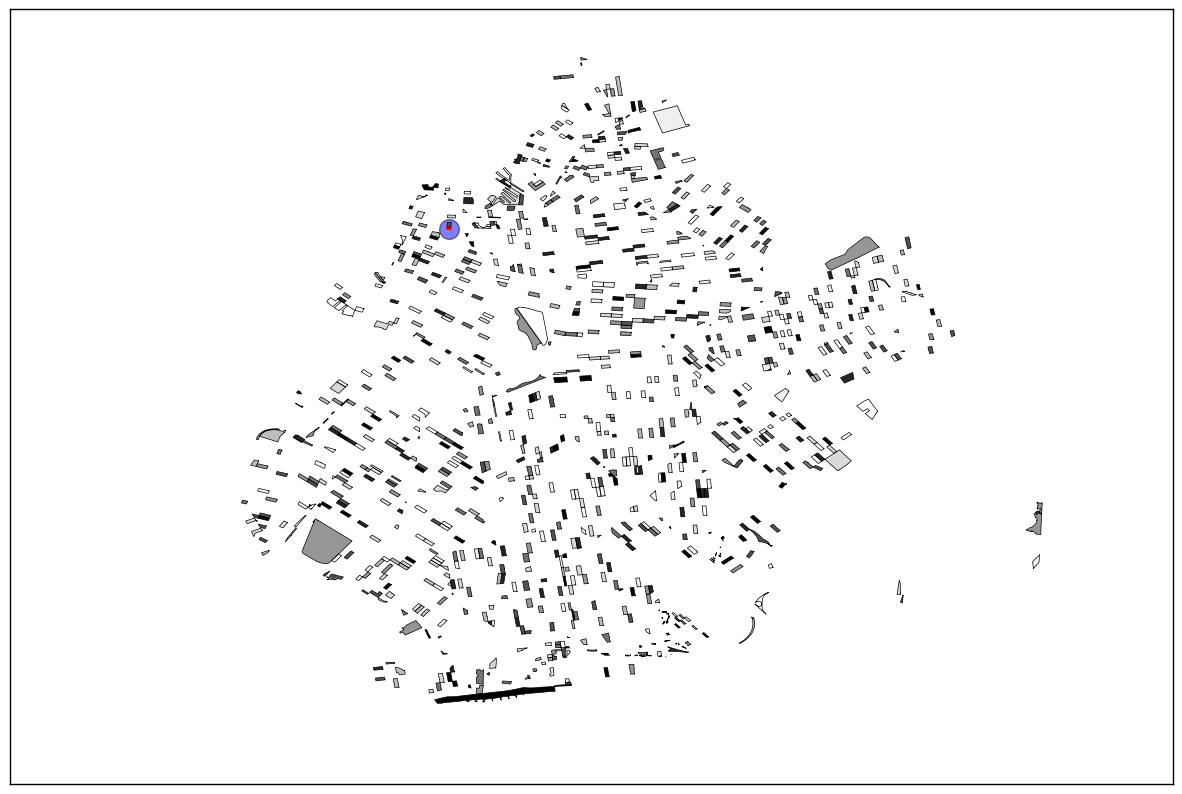

In [90]:
f, ax = plt.subplots(figsize = (15,10))
ct_latlon_10.geometry.plot(cmap='Greys', alpha=1, linewidth=0.5, ax=ax)
ax.scatter(CUSP.x, CUSP.y, c='blue', alpha=0.5, s=200)   
ct_patch = PolygonPatch(ct, fc='red', ec='red', alpha=1)
ax.add_patch(ct_patch) ##necessary!!
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.legend()